In [ ]:
# Setup
from fastai.vision.all import *

In [2]:
# Initialize dataset
path = ('/Users/joo/Developer/jupyternotebooks/guitarwho/datasets/guitars')

In [3]:
# Verify dataset
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [4]:
# Create DataBlock out of data
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

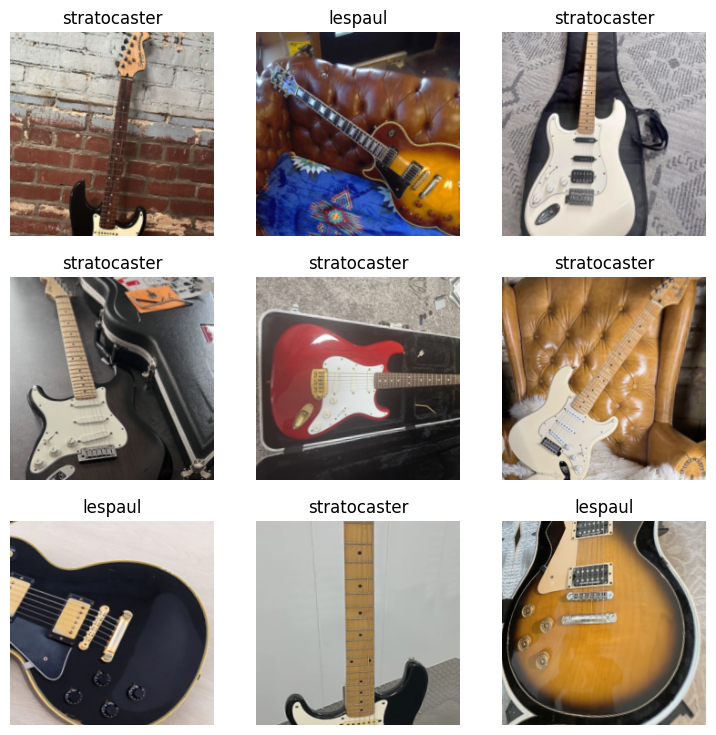

In [5]:
# Augment data for training
guitars = guitars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = guitars.dataloaders(path)
dls.show_batch()

In [6]:
# Train model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.650702,0.962037,0.468750,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.766374,0.612979,0.281250,00:01
1,0.622903,0.400192,0.218750,00:01
2,0.488259,0.285705,0.125000,00:01
3,0.399937,0.212827,0.093750,00:01
4,0.336765,0.183692,0.093750,00:01


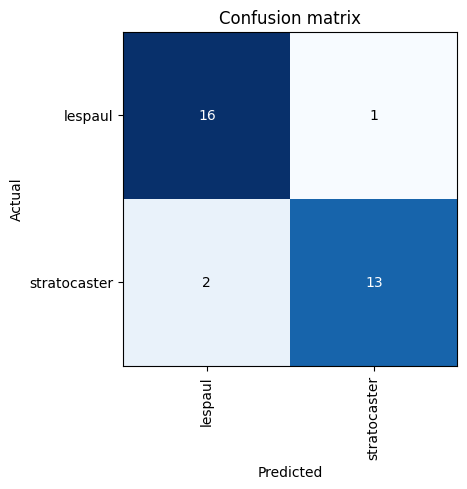

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

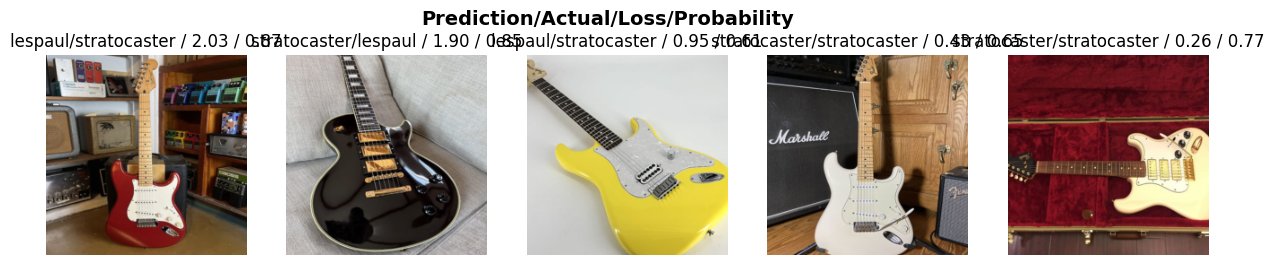

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
# Export trained model
learn.export('model.pkl')